## Import thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Đọc file

In [3]:
survey_df = pd.read_csv('Data/survey.csv')
survey_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Câu hỏi 1: Mức độ sẵn sàng thảo luận các vấn đề sức khỏe tâm thần của người trả lời với người giám sát và đồng nghiệp của họ như thế nào và điều này thay đổi như thế nào tùy theo quy mô của công ty và Quốc gia?

- **Mục tiêu:** Giúp chúng ta hiểu về sự sẵn sàng chung của nhân viên để thảo luận các vấn đề sức khỏe tâm thần của họ. Và liên quan tới quy mô, thông tin này có thể có giá trị để các tổ chức đánh giá các chính sách sức khỏe tâm thần của họ và tạo môi trường hỗ trợ cho nhân viên của họ. Nó cũng có thể cung cấp thông tin cho các sáng kiến nhằm giảm bớt sự kỳ thị liên quan đến việc thảo luận về sức khỏe tâm thần tại nơi làm việc.

Để trả lời câu hỏi này, ta sẽ sử dụng các cột `coworkers`, `supervisor`, `Country` và `no_employees`.

Các công việc cụ thể:
- Nhóm người trả lời theo quy mô công ty.
- So sánh tỷ lệ sẵn sàng thảo luận các vấn đề sức khỏe tâm thần trong cột `supervisor` và cột `coworkers`.

## Preprocessing

Xem thông tin của các cột `coworkers`, `supervisor`, `Country` và `no_employees`.

In [54]:
survey_df[['coworkers','supervisor','Country','no_employees']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coworkers     1259 non-null   object
 1   supervisor    1259 non-null   object
 2   Country       1259 non-null   object
 3   no_employees  1259 non-null   object
dtypes: object(4)
memory usage: 39.5+ KB


Không có missing values, cũng không có bất thường ở kiểu dữ liệu.

## EDA

Tạo hai DataFrame `supervisor_df` và `coworkers_df` lưu từng nhóm người trả lời theo quy mô công ty với ba nhóm: Yes, No và Some of them.

In [55]:
# Create a new DataFrame by grouping 'no_employees'
supervisor_df = survey_df.groupby(['no_employees','supervisor']).size().unstack()

coworkers_df = survey_df.groupby(['no_employees','coworkers']).size().unstack()

# Specify the new order of the columns
new_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

# Reorder the columns
supervisor_df = supervisor_df.reindex(new_order, axis=0)
coworkers_df = coworkers_df.reindex(new_order, axis=0)

#supervisor_df
coworkers_df

coworkers,No,Some of them,Yes
no_employees,,,
1-5,30,92,40
6-25,52,176,62
26-100,52,184,53
100-500,30,117,29
500-1000,14,39,7
More than 1000,82,166,34


Để thể hiện rõ sự so sánh giữa quy mô công ty, ta sẽ chuyển các cột giá trị `No`, `Some of them` và `Yes` của hai DataFrame này thành dạng `%`.

In [59]:
# Calculate the sum of each row
def row_sum(df):
    row_sum = df.sum(axis=1)
    return row_sum

# Divide each value in the DataFrame by the sum of its row and multiply by 100
percent_supervisor_df = supervisor_df.div(row_sum(supervisor_df), axis=0) * 100
percent_coworkers_df = coworkers_df.div(row_sum(coworkers_df), axis=0) * 100

#percent_supervisor_df
percent_coworkers_df

coworkers,No,Some of them,Yes
no_employees,,,
1-5,18.518519,56.790123,24.691358
6-25,17.931034,60.689655,21.379310
26-100,17.993080,63.667820,18.339100
100-500,17.045455,66.477273,16.477273
500-1000,23.333333,65.000000,11.666667
More than 1000,29.078014,58.865248,12.056738


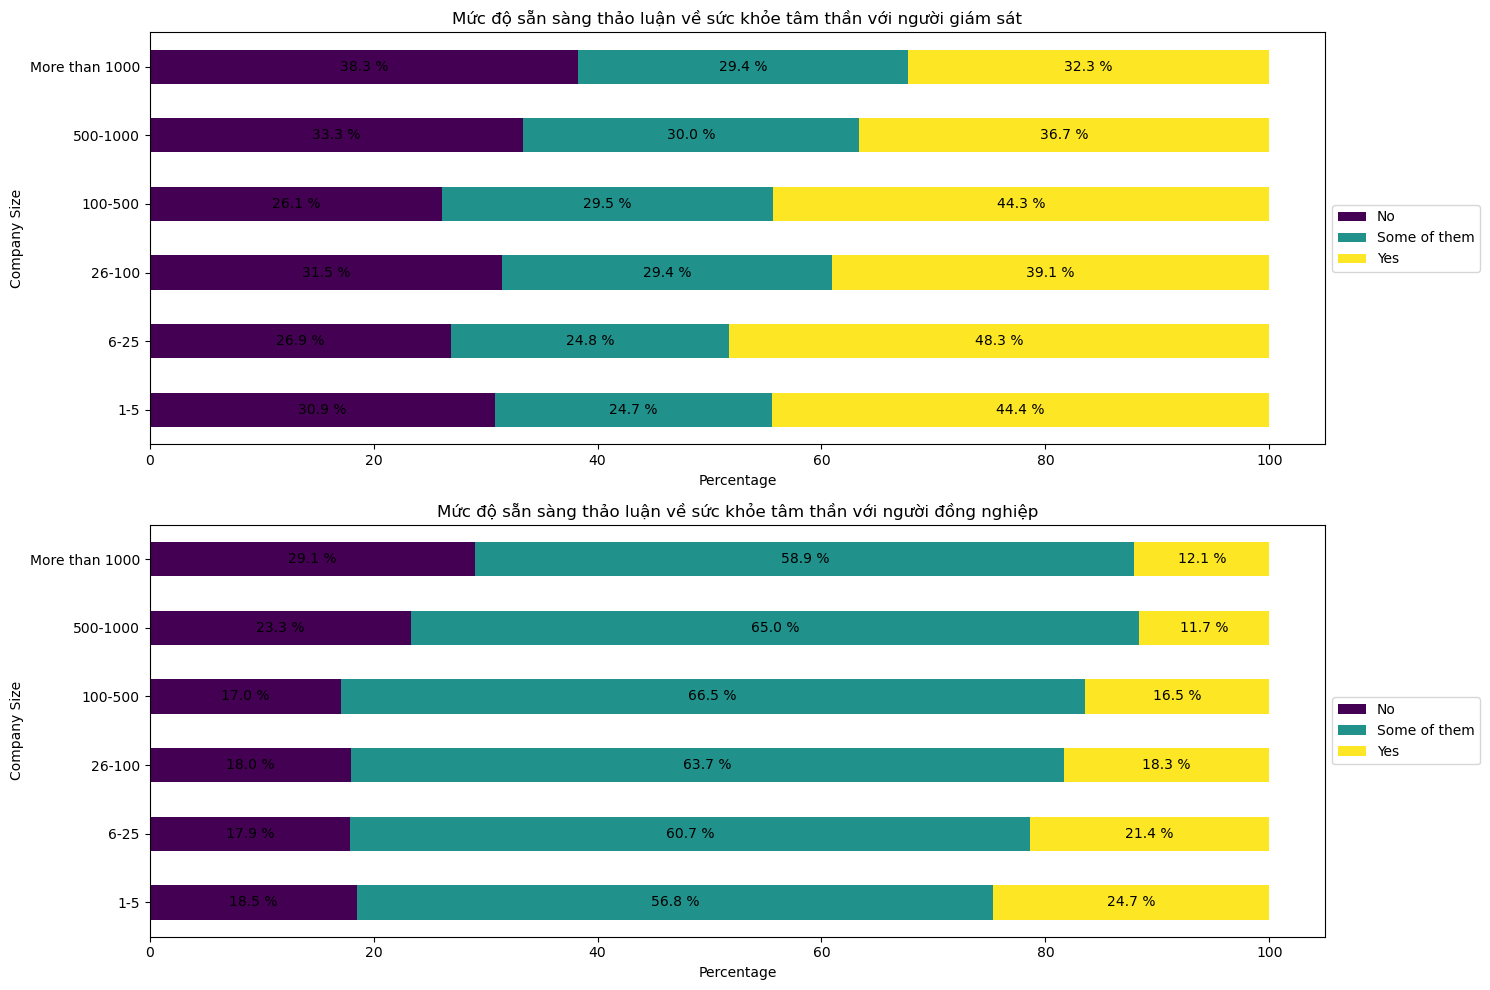

In [85]:
# Plot
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

def barh_plot(df, ax, title):
    df.plot(kind='barh', stacked=True, colormap='viridis', ax=ax)

    # Add values into the columns
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f} %'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')

    ax.set_title(title)
    ax.set_ylabel('Company Size')
    ax.set_xlabel('Percentage')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


barh_plot(percent_supervisor_df, axs[0], "Mức độ sẵn sàng thảo luận về sức khỏe tâm thần với người giám sát")
barh_plot(percent_coworkers_df, axs[1], "Mức độ sẵn sàng thảo luận về sức khỏe tâm thần với người đồng nghiệp")

plt.tight_layout()
plt.show()

### Nhận xét:

Ở biểu đồ **Mức độ sẵn sàng thảo luận về sức khỏe tâm thần với người giám sát**:
- Số người trả lời **Some of them** ít hơn 2 phần còn lại, lí giải điều này có thể do ở một số công ty, người giám sát chỉ có 1 hoặc vài người nên người trả lời coi như không có lựa chọn này.
- Nhìn chung số người trả lời **Yes** giảm dần so với quy mô công ty ngày càng tăng, và tương tự số người trả lời **No** thì lại tăng dần. 
    - Điều này cho ta thấy trong các công ty nhỏ và vừa, mối quan hệ giữa nhân viên và người giám sát có thể gần gũi hơn, do đó có thể dễ dàng thảo luận về vấn đề sức khỏe tâm thần hơn. 
    - Tuy nhiên, trong các công ty lớn, việc thảo luận về vấn đề này có thể trở nên khó khăn hơn do sự tách biệt giữa các cấp quản lý.

Ở biểu đồ **Mức độ sẵn sàng thảo luận về sức khỏe tâm thần với đồng nghiệp**:
- Số người trả lời **Some of them** nhiều hơn 2 phần còn lại, do có thể đồng nghiệp chỉ phần chung toàn bộ công ty, nên câu trả lời này cũng có thể được tính là **Yes**.
- Cũng như biểu đồ trên, số người trả lời **Yes** giảm dần so với quy mô công ty ngày càng tăng, và tương tự số người trả lời **No** thì lại tăng dần. 
    - Giải thích tương tự như trên, với các công ty vừa và nhỏ, đồng nghiệp gần gũi nên có thể dễ dàng tương tác, thảo luận về vấn đề sức khỏe tâm thần hơn các công ty lớn.

Nếu ta coi **Some of them** đồng nghĩa với **Yes**, thì với 2 đối tượng `Người giám sát` và `Đồng nghiệp` người ta có xu hướng thảo luận thoải mái với đồng nghiệp hơn. Đây cũng là tâm lí chung của mọi người

Tuy nhiên, điều quan trọng là mọi người cần được khuyến khích và hỗ trợ để thảo luận về sức khỏe tâm thần của họ một cách an toàn và không bị đánh đồng. Điều này không chỉ giúp cải thiện sức khỏe tâm thần của nhân viên, mà còn tạo ra một môi trường làm việc tích cực và hiệu quả.